In [1]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip
import matplotlib.pyplot as plt
import numpy as np
from data import get_cifar10_loaders

In [2]:
root="data/"

In [3]:
train_data = CIFAR10(root, download=True)

x = train_data.data
y = np.array(train_data.targets)

print(x.shape)
print(y.shape)

Files already downloaded and verified
(50000, 32, 32, 3)
(50000,)


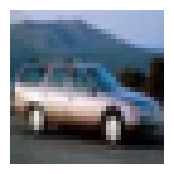

In [4]:
image = x[4]

# plt.axis("off")
fig, ax = plt.subplots(figsize=(2, 2))
ax.axis("off")
ax.imshow(image)
plt.show()

In [5]:
class Cutout:
    def __init__(self, size):
        self.size = size

    def __call__(self, x):
        x0, y0 = torch.randint(x.shape[2] - self.size, (1,)), torch.randint(x.shape[3] - self.size, (1,))
        img = x.clone()
        img[..., y0:y0+self.size, x0:x0+self.size] = 0.0
        return img

In [6]:
pipeline = Compose([
    RandomCrop(32), 
    RandomHorizontalFlip(0.5),
    Cutout(8)
])

In [7]:
train_dataloader, test_dataloader = get_cifar10_loaders(512)

Files already downloaded and verified
Files already downloaded and verified
50,000 training samples.
10,000 test samples.


In [10]:
# border = 4
# x_tr = np.pad(
#     x, [(0, 0), (border, border), (border, border), (0, 0)], mode="reflect"
# )
x_tr = x

mean, std = x_tr.transpose(0, 3, 1, 2).mean(axis=0), x_tr.transpose(0, 3, 1, 2).std(axis=0)

mean = torch.tensor(mean[None, :])
std = torch.tensor(std[None, :])

print(mean.shape)
print(std.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])


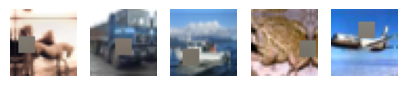

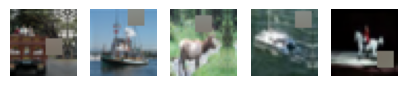

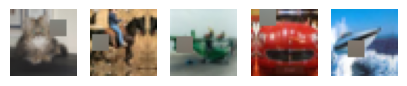

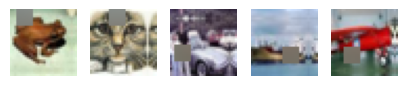

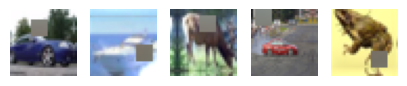

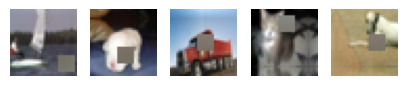

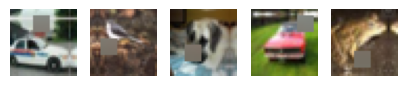

In [15]:
for i, (x_batch, y_batch) in enumerate(train_dataloader):

    x_batch = std * x_batch + mean
    # x_processed = pipeline(x_batch)
    fig, ax = plt.subplots(1, 5, figsize=(5, 2))
    for j in range(5):
        # ax[0, j].imshow(torch.round(x_batch[j].permute([1, 2, 0])).int().numpy())
        # ax[0, j].axis("off")
        # ax[1, j].imshow(torch.round(x_processed[j].permute([1, 2, 0])).int().numpy())
        # ax[1, j].axis("off")
        ax[j].imshow(np.clip(torch.round(x_batch[j].permute([1, 2, 0])).int().numpy(), 0, 255))
        ax[j].axis("off")
    
    if i == 6:
        break
plt.axis("off")
plt.show()

In [6]:
lrs = np.interp(np.arange(24), [0, 5, 24], [1e-4, 0.4, 0])

In [7]:
lrs

array([1.00000000e-04, 8.00800000e-02, 1.60060000e-01, 2.40040000e-01,
       3.20020000e-01, 4.00000000e-01, 3.78947368e-01, 3.57894737e-01,
       3.36842105e-01, 3.15789474e-01, 2.94736842e-01, 2.73684211e-01,
       2.52631579e-01, 2.31578947e-01, 2.10526316e-01, 1.89473684e-01,
       1.68421053e-01, 1.47368421e-01, 1.26315789e-01, 1.05263158e-01,
       8.42105263e-02, 6.31578947e-02, 4.21052632e-02, 2.10526316e-02])